# Basic Statistics
>Basic statistics involve calculating measures like mean, median, standard deviation, and count for each column. Here’s how you can do it in Python:

In [1]:
import pandas as pd

# Load the data
data = pd.read_csv('/content/bmi.csv')

# Display basic statistics
basic_stats = data.describe()
print(basic_stats)


           Height      Weight       Index
count  500.000000  500.000000  500.000000
mean   169.944000  106.000000    3.748000
std     16.375261   32.382607    1.355053
min    140.000000   50.000000    0.000000
25%    156.000000   80.000000    3.000000
50%    170.500000  106.000000    4.000000
75%    184.000000  136.000000    5.000000
max    199.000000  160.000000    5.000000


#Advanced Statistics
> Advanced statistics might include correlations, regression analysis, hypothesis testing, etc. For example, to calculate the correlation matrix and perform a linear regression analysis, you can use the following code:

In [2]:
import statsmodels.api as sm

# Correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)

# Linear regression (predicting Weight based on Height and Index for example)
X = data[['Height', 'Index']]  # independent variables
y = data['Weight']  # dependent variable

# Adding a constant for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()
print(model.summary())


          Height    Weight     Index
Height  1.000000  0.000446 -0.422223
Weight  0.000446  1.000000  0.804569
Index  -0.422223  0.804569  1.000000
                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     924.4
Date:                Sun, 24 Mar 2024   Prob (F-statistic):          3.34e-168
Time:                        03:38:11   Log-Likelihood:                -2059.8
No. Observations:                 500   AIC:                             4126.
Df Residuals:                     497   BIC:                             4138.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0

<ipython-input-2-bd0435a05e4d>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


# Multiple Regression Analysis
> Indented blockIf you have multiple independent variables and want to see how they collectively affect a dependent variable, you can use multiple regression analysis.



In [4]:
import statsmodels.api as sm

# Convert data to DataFrame
df = pd.DataFrame(data)

# Prepare the data for clustering (excluding the 'Gender' column)
X = df[['Height', 'Weight', 'Index']]
X = df[['Height', 'Index']]  # independent variables
y = df['Weight']  # dependent variable

X = sm.add_constant(X)  # adding a constant for the intercept
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     924.4
Date:                Sun, 24 Mar 2024   Prob (F-statistic):          3.34e-168
Time:                        03:44:36   Log-Likelihood:                -2059.8
No. Observations:                 500   AIC:                             4126.
Df Residuals:                     497   BIC:                             4138.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -120.8344      8.740    -13.826      0.0

# Principal Component Analysis (PCA)
> PCA is used for dimensionality reduction while preserving as much of the data's variation as possible.

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # reduce to 2 dimensions for example
pca_result = pca.fit_transform(df[['Height', 'Weight', 'Index']])
print(pca.explained_variance_ratio_)

[0.79615335 0.20360479]


# Time Series Analysis
> If your data has a time component, you can analyze how a variable changes over time.

In [ ]:
# Assuming you have a 'Date' column and a 'Value' column in your dataframe
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['Value'].plot()

# Hypothesis Testing
> To compare different groups or check if a sample comes from a particular distribution.

In [ ]:
from scipy import stats

# Example of a t-test
# Assuming 'Group1' and 'Group2' are two columns or lists of data
t_statistic, p_value = stats.ttest_ind(df['Group1'], df['Group2'])
print(t_statistic, p_value)

# Let's plot

# 1. Scatter Plot
>A scatter plot is useful for showing the relationship between two numerical variables.

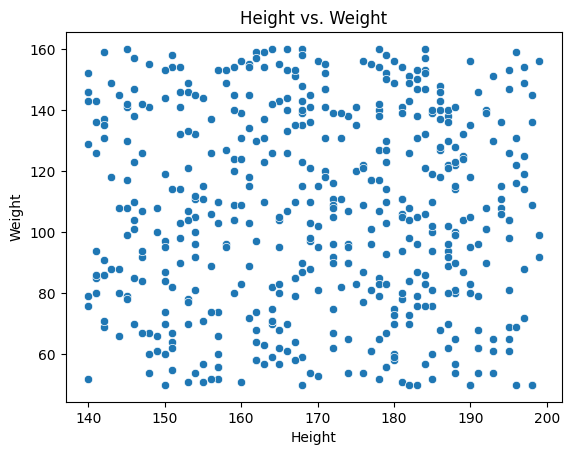

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is your DataFrame loaded from the 'bmi.csv' file
sns.scatterplot(data=df, x='Height', y='Weight')
plt.title('Height vs. Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

# 2. Box Plot
> A box plot is useful for showing the distribution of numerical data and its quartiles, highlighting outliers.

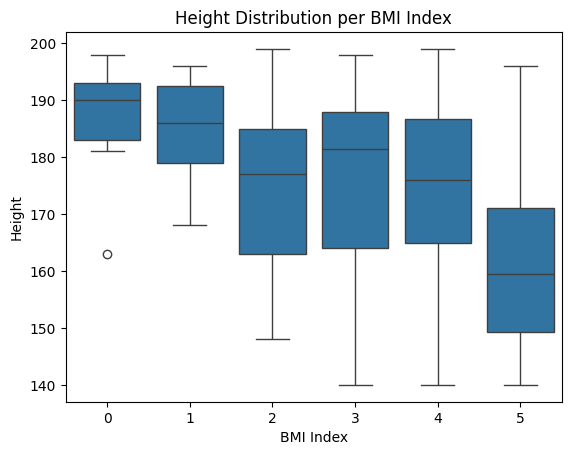

In [9]:
sns.boxplot(data=df, x='Index', y='Height')
plt.title('Height Distribution per BMI Index')
plt.xlabel('BMI Index')
plt.ylabel('Height')
plt.show()


# 3. Pie Chart
> A pie chart is useful for showing the proportion of categories in the data.

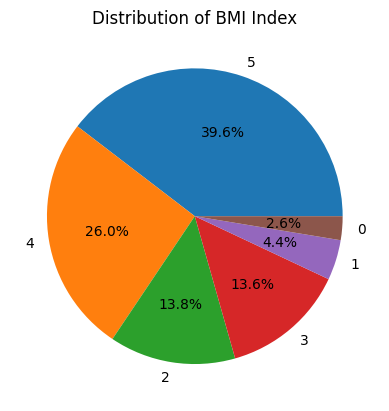

In [10]:
index_counts = df['Index'].value_counts()
plt.pie(index_counts, labels=index_counts.index, autopct='%1.1f%%')
plt.title('Distribution of BMI Index')
plt.show()
